In [15]:
# std
import os
from os import path
import time

# 3p
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# prj
os.chdir("..")
from src import helpers, configuration, filtering, bandpower, plots, statistics as stats
from src.configuration import cfg
os.chdir('analysis-adelie')

# statistics
from scipy.stats import ttest_ind

# plots
import matplotlib

font = {'family':'DejaVu Sans', 'weight':'normal', 'size':10}
matplotlib.rc('font', **font)

#%matplotlib qt
%matplotlib inline

In [5]:
def get_concat_signal(data_type, subject="adelie", config=cfg):
    dfs = [
        helpers.load_signal_data(data_type, subject=subject, recording=recording, config=config)
        for recording in range(
            len(config["paths"]["subjects"][subject]["recordings"][data_type])
        )
    ]

    for i in range(len(dfs) - 1):
        dfs[i + 1].index += dfs[i].index.max()

    concatenated = pd.concat(dfs)
    return concatenated

## Correlation Matrices

In [6]:
baseline_adelie = helpers.load_signal_data('baseline', config=cfg, subject="adelie")
meditation_adelie = helpers.load_signal_data('meditation', config=cfg, subject="adelie")

In [7]:
baseline_correlations = baseline_adelie.groupby(pd.Grouper(freq='10S')).corr()
baseline_singular_values = baseline_correlations.groupby(level=0).filter(lambda g: g.isnull().sum().sum() == 0).groupby(level=0).apply(lambda x: sum(np.linalg.eig(x)[0][:5]))
baseline_singular_values

00:00:09.991072    17.358204
00:00:19.991072    17.169987
00:00:29.991072    18.112519
00:00:39.991072    17.449496
00:00:49.991072    17.362255
00:00:59.991072    17.722910
00:01:09.991072    17.775911
00:01:19.991072    17.350309
00:01:29.991072    17.995465
00:01:39.991072    17.709902
00:01:49.991072    17.745200
dtype: float64

In [8]:
meditation_correlations = meditation_adelie.groupby(pd.Grouper(freq='10S')).corr()
meditation_singular_values = meditation_correlations.groupby(level=0).filter(lambda g: g.isnull().sum().sum() == 0).groupby(level=0).apply(lambda x: sum(np.linalg.eig(x)[0][:5]))
meditation_singular_values

00:00:09.991831    18.088781
00:00:19.991831    18.301153
00:00:29.991831    17.605263
00:00:39.991831    17.600242
00:00:49.991831    16.895903
00:00:59.991831    17.218328
00:01:09.991831    17.311819
00:01:19.991831    16.694448
00:01:29.991831    17.618831
00:01:39.991831    16.492286
00:01:49.991831    18.089486
00:01:59.991831    17.506237
00:02:09.991831    17.243134
00:02:19.991831    17.799673
00:02:29.991831    17.565709
00:02:39.991831    17.444578
00:02:49.991831    17.151015
00:02:59.991831    18.269498
00:03:09.991831    18.445603
00:03:19.991831    17.784546
00:03:29.991831    17.928420
00:03:39.991831    17.372899
00:03:49.991831    18.699435
00:03:59.991831    17.870365
00:04:09.991831    19.168286
00:04:19.991831    17.143259
00:04:29.991831    17.128848
00:04:39.991831    16.561001
00:04:49.991831    16.983360
dtype: float64

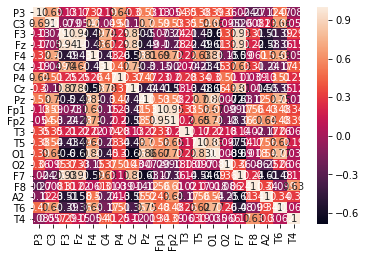

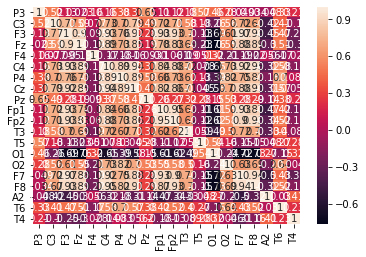

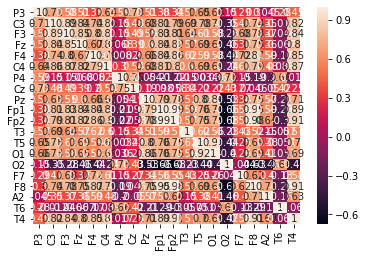

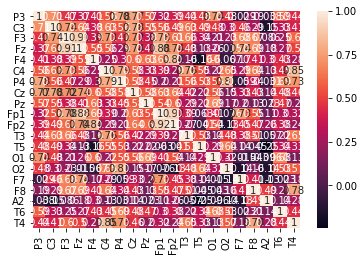

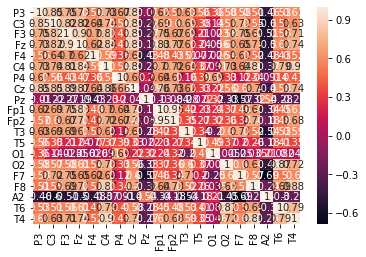

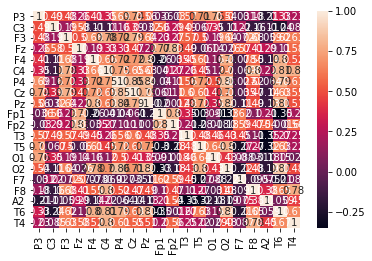

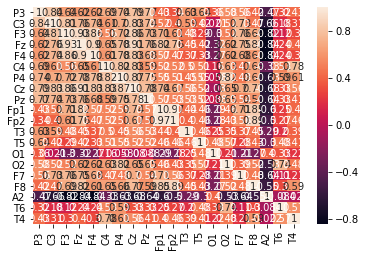

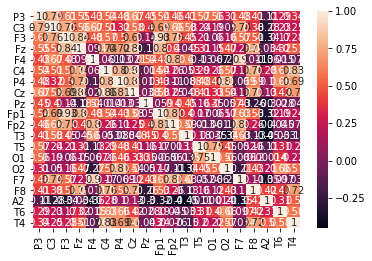

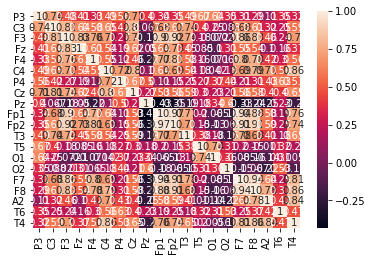

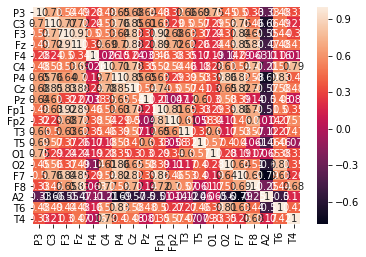

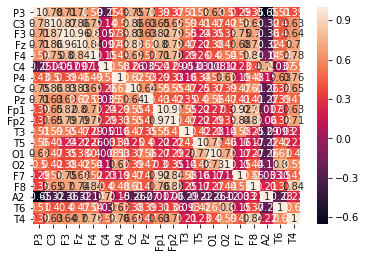

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 432x288 with 0 Axes>

In [16]:
import seaborn as sn

for c in baseline_correlations.groupby(level=0):
    plt.clf()
    mask = c[1].reset_index(level=0, drop=True).isnull()
    sn.heatmap(c[1].reset_index(level=0, drop=True), annot=True, mask=mask)
    plt.show()
    
# mask = c[1].reset_index(level=0, drop=True).isnull()
# sn.heatmap(c[1].reset_index(level=0, drop=True), annot=True, mask=mask)
# plt.show()

In [12]:
# for c in meditation_correlations.groupby(level=0):
#     plt.clf()
#     mask = c[1].reset_index(level=0, drop=True).isnull()
#     sn.heatmap(c[1].reset_index(level=0, drop=True), annot=True, mask=mask)
#     plt.show()

In [13]:
import matplotlib.animation as animation

frames = len(list(meditation_correlations.groupby(level=0)))
def get_data(i=0):
    name, group = list(meditation_correlations.groupby(level=0))[i]
    return name, group
    
fig = plt.figure()
n, g = get_data()
m = g.reset_index(level=0, drop=True).isnull()
sn.heatmap(g.reset_index(level=0, drop=True), annot=False, mask=m)

def animate(i):
    plt.clf()
    name, group = get_data(i)
    mask = group.reset_index(level=0, drop=True).isnull()
    sn.heatmap(group.reset_index(level=0, drop=True), annot=False, mask=mask)
    
def init():
    return animate(0)

anim = animation.FuncAnimation(fig, animate, frames=frames, repeat = False, interval=10, blit=False)

#### Former work

In [ ]:
import matplotlib.animation as animation

heat, = plt.plot([],[]) 

# fonction à définir quand blit=True
# crée l'arrière de l'animation qui sera présent sur chaque image
def init():
    heat.set_data([],[])
    return heat,

def animate(i):
    for name, group in meditation_correlations.groupby(level=0):
        mask = group.reset_index(level=0, drop=True).isnull()
        yield sn.heatmap(group.reset_index(level=0, drop=True), annot=True, mask=mask)
    
fig = plt.figure() # initialise la figure
ani = animation.FuncAnimation(fig, animate, frames=100, blit=True, interval=100, repeat=False)
plt.show()